<a href="https://colab.research.google.com/github/Mukilan-Krishnakumar/MultiLabelClassification_MovieSummaries/blob/main/EDA_of_MovieSummaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MultiLabel Classification 
Consider a situation in which you go to the theater, you want to watch a movie which is both Adventure and Comedy. In this case if the **usher** (like the cashier in the theater) asks you to only choose one of those genres then the movie probably wouldn’t be good (atleast for you). 

The ability to choose something which isn’t **mutually exclusive** is multilabel classification.

**Mutually Exclusive :** Heads or Tails. You cannot have both Heads and Tails at the same toss of coin.

Movie Genres are not mutually exclusive, you can have a movie which is Adventurous, Comedy and Historic, all at the same time. This is the reason we will be using MovieSummaries Dataset to learn about MultiLabel Classification. 

This is a follow along demonstration of MultiLabel Classification. This tutorial assumes basic knowledge of Python, Pandas, Visualisation libraries.

This is part 1 of MultiLabel Classification which performs EDA on the dataset.

#  MovieSummaries Dataset:

The dataset can be downloaded from the following [link](http://www.cs.cmu.edu/~ark/personas/).

This dataset contains 42,306 movie plot summaries extracted from Wikipedia along with metadata extracted from FreeBase. We will be using only two files : `movie.metadata.tsv` and `plot_summaries.txt` . 

You can also use my `!gdown --id` code if you don’t want to download the whole dataset in your local computer.

# GamePlan:

## 1. Downloading the Data Set

## 2. Reading the Data Set

## 3. Exploratory Data Analysis (EDA)

## Let’s Get Started


# 1. Downloading the Data Set:

In [1]:
!gdown --id 1fD9_t_EFOYTe4PXh4V9WTsKqHBL1z6VR
!gdown --id 1LmO50zgMg_zg-cNWLGIPO5A4WROg-6BP

Downloading...
From: https://drive.google.com/uc?id=1fD9_t_EFOYTe4PXh4V9WTsKqHBL1z6VR
To: /content/plot_summaries.txt
100% 75.9M/75.9M [00:00<00:00, 106MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1LmO50zgMg_zg-cNWLGIPO5A4WROg-6BP
To: /content/movie.metadata.tsv
100% 16.3M/16.3M [00:00<00:00, 51.5MB/s]


We need to import necessary libraries for performing EDA. 

We will be importing the following modules:

- Pandas - For data manupalation and analysis
- Numpy - For array manipulation
- Matplotlib.pyplot - For plotting graphs and visualizing data
- Seaborn - For high level visualization
- csv - For reading and writing CSV files
- tqdm - Instantly make your loops show a smart progress meter
- json - to store and transfer json format data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import json
from tqdm import tqdm
import seaborn as sns

# 2. Reading the Data Set:

In [3]:
genre = pd.read_table('/content/movie.metadata.tsv',header = None)
genre.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


If you see the code, you can see that the data file is of format **tsv** . It stands for Tab Seperated Value and all the records are seperated by tab. 

We can see that we get few columns which don’t provide us with any meaning, so we are going to **drop** them.

In [4]:
genre = genre.drop([1,3,4,5,6,7],axis = 1)

In [5]:
genre.head()

,0,2,8
0,975900,Ghosts of Mars,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,Brun bitter,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,White Of The Eye,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,A Woman in Flames,"{""/m/07s9rl0"": ""Drama""}"


Now that we have removed the useless columns, let us name the other columns.

In [6]:
column_name = ['Movie_Id','Movie_Name','Movie_Genres']
genre.columns = column_name

In [7]:
genre.head()

,Movie_Id,Movie_Name,Movie_Genres
0,975900,Ghosts of Mars,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,Brun bitter,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,White Of The Eye,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,A Woman in Flames,"{""/m/07s9rl0"": ""Drama""}"


We have downloaded the tsv file, which is the easy part. Now we need to download the txt file and convert it into a **Pandas DataFrame**. The following code achieves that:

In [8]:
file_path = '/content/plot_summaries.txt'
plot_f = []
with open(file_path, 'r') as f:
    r = csv.reader(f, dialect='excel-tab') 
    for row in r:
        plot_f.append(row)

In [9]:
movie_plot = []
movie_id = []

for i in plot_f:
  movie_plot.append(i[1])
  movie_id.append(i[0])

plot = pd.DataFrame({'Movie_Id': movie_id, 'Movie_Plot': movie_plot})
plot.head()

,Movie_Id,Movie_Plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In this code snippet, we can see that first we open the text file, get the movie_id and movie_plot and add it to a python list named `plot_f` . We split the list into seperate movie_id and movie_plot, which is then used to make a Pandas DataFrame.

The `Movie_Id` variable may be of type float, we are going to convert them into String type to perform `merge` function.

In [10]:
genre['Movie_Id'] = genre['Movie_Id'].astype(str)
plot['Movie_Id'] = plot['Movie_Id'].astype(str)

In [11]:
genre['Movie_Id']

0          975900
1         3196793
2        28463795
3         9363483
4          261236
           ...   
81736    35228177
81737    34980460
81738     9971909
81739      913762
81740    12476867
Name: Movie_Id, Length: 81741, dtype: object

In [12]:
plot['Movie_Id']

0        23890098
1        31186339
2        20663735
3         2231378
4          595909
           ...   
42298    34808485
42299     1096473
42300    35102018
42301     8628195
42302     6040782
Name: Movie_Id, Length: 42303, dtype: object

We can see that in both the tables, `Movie_Id` is of type object, which is what we need.

Now, we can merge both of these tables.

In [13]:
final_df = pd.merge(genre,plot,on = "Movie_Id")

In [14]:
final_df.head()

,Movie_Id,Movie_Name,Movie_Genres,Movie_Plot
0,975900,Ghosts of Mars,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th..."
1,9363483,White Of The Eye,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...
2,261236,A Woman in Flames,"{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra..."
3,18998739,The Sorcerer's Apprentice,"{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","Every hundred years, the evil Morgana returns..."
4,6631279,Little city,"{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","Adam, a San Francisco-based artist who works a..."


# 3. Exploratory Data Analysis

Now we get to the interesting part of the whole tutorial. We are going to get the genre types which, as we can see, are inside a dictionary of sorts. 

We can take the values outside using `json.loads()` .

In [15]:
json.loads(final_df['Movie_Genres'][0]).values()

dict_values(['Thriller', 'Science Fiction', 'Horror', 'Adventure', 'Supernatural', 'Action', 'Space western'])

Now, we will create a variable called `movie_genres_updated` which will go through the `final_df['Movie_Genres']` and converts all the dictionary values (json) into lists.

In [16]:
movie_genres_updated = []
for i in final_df['Movie_Genres']:
  movie_genres_updated.append(list(json.loads(i).values()))

In [17]:
final_df['Movie_Genres'] = movie_genres_updated

In [18]:
final_df.head()

,Movie_Id,Movie_Name,Movie_Genres,Movie_Plot
0,975900,Ghosts of Mars,"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,9363483,White Of The Eye,"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
2,261236,A Woman in Flames,[Drama],"Eva, an upper class housewife, becomes frustra..."
3,18998739,The Sorcerer's Apprentice,"[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns..."
4,6631279,Little city,"[Romantic comedy, Ensemble Film, Comedy-drama,...","Adam, a San Francisco-based artist who works a..."


Now all our genres are in a list, but we cannot perform **EDA** without knowing the number of times a Genre repeats. So we are going to remove the list and create a dictionary with the key values being the **frequency** of genres.

In [19]:
total_genres = sum(movie_genres_updated,[])
unique_genres = set(total_genres)

In [20]:
len(unique_genres)

363

In [21]:
genres_dict = {}
for i in tqdm(unique_genres):
  count = 0
  for j in total_genres:
    if j == i:
      count += 1
  genres_dict[i] = count

100%|██████████| 363/363 [00:06<00:00, 54.42it/s]


We got the frequency distribution of the genres, now we can perform **EDA.**

Now, we are going to create 4 functions:

1. **n_largest_dict_maker** : Creates the n largest frequency of genres
2. **n_smallest_dict_maker** : Creates the n smallest frequence of genres
3. **pieChartMake**r : For creating a Pie Chart
4. **barPlotMaker** :  For creating a bar plot

In [22]:
def n_largest_dict_maker(dict_name,n_value):
  '''
  This function takes two inputs : a dataframe and n_value. It return top n_value of 
  labels and their frequencies
  '''
  n_largest_dict = sorted(dict_name.values(),reverse = True)
  l = n_largest_dict[n_value]
  labels = []
  sizes = []

  for x, y in genres_dict.items():
    if y > l:
      labels.append(x)
      sizes.append(y)
  return labels, sizes

def n_smallest_dict_maker(dict_name,n_value):
  '''
  This function takes two inputs : a dataframe and n_value. It return bottom n_value of 
  labels and their frequencies
  '''
  n_largest_dict = sorted(dict_name.values(),reverse = True)
  l = n_largest_dict[-1 * n_value]
  labels = []
  sizes = []

  for x, y in genres_dict.items():
    if y < l:
      labels.append(x)
      sizes.append(y)
  return labels, sizes

def pieChartMaker(labels,sizes):
  '''
  This function creates a pie chart from labels(genres) and their sizes(frequencies)
  '''
  colors = sns.color_palette('pastel')[0:5]
  plt.pie(sizes, labels=labels, colors = colors)
  plt.axis('equal')
  plt.show()

def barPlotMaker(labels,sizes):
  '''
  This function creates a bar plot from labels(genres) and their sizes(frequencies)
  '''
  n_df = pd.DataFrame({"Labels" : labels,"Sizes" : sizes})
  plt.figure(figsize=(12,15))
  ax = sns.barplot(data=n_df, x= "Sizes", y = "Labels")
  ax.set(ylabel = 'Sizes')
  plt.show()

That’s it, we can visualize the distribution of genres. We will look at the following things:

1. Bar Plot of Top 30 Genres
2. Bar Plot of Bottom 30 Genres
3. Pie Chart of Bottom 30 Genres

## 1. Bar Plot of Top 30 Genres

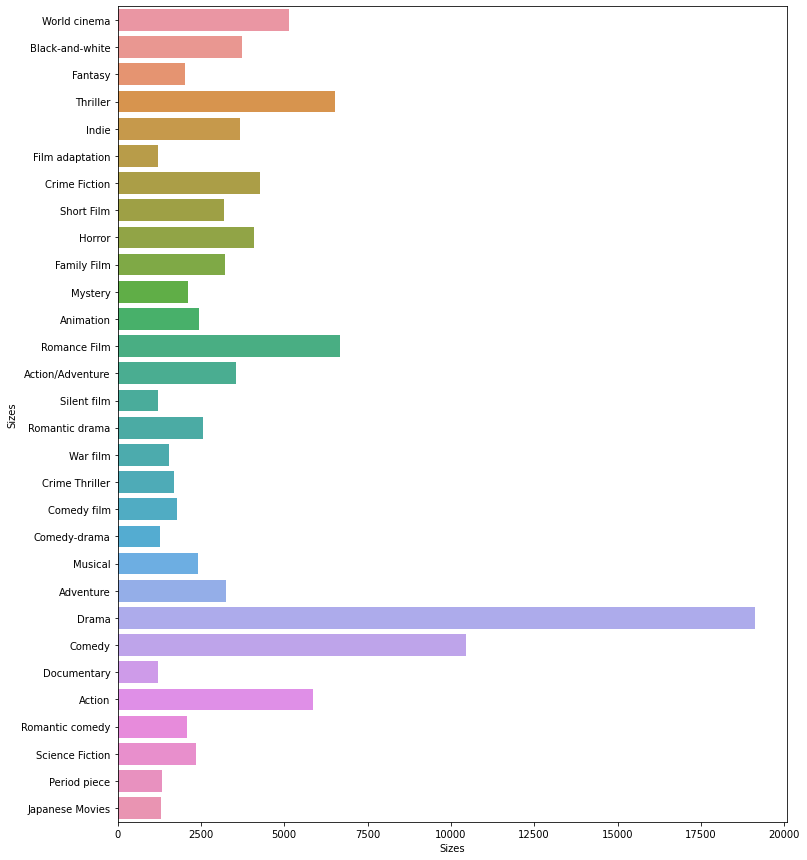

In [23]:
labels,sizes = n_largest_dict_maker(genres_dict,30)
barPlotMaker(labels,sizes)

## 2. Bar Plot of Bottom 30 Genres

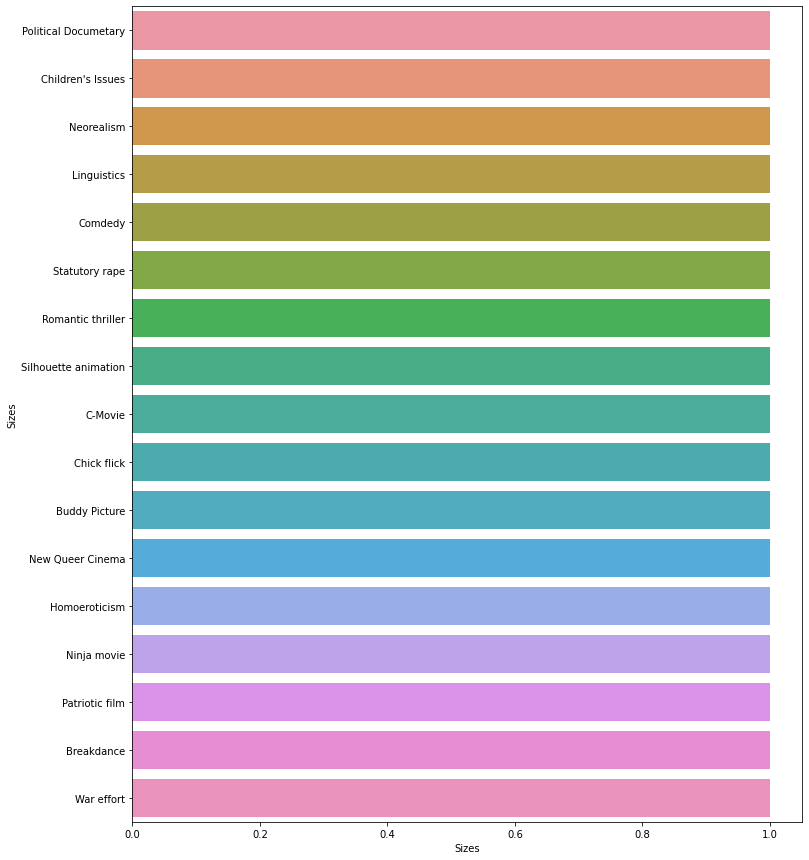

In [24]:
labels,sizes = n_smallest_dict_maker(genres_dict,30)
barPlotMaker(labels,sizes)

## 3. Pie Chart of Top 20 Genres

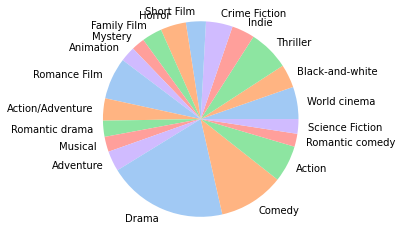

In [25]:
labels,sizes = n_largest_dict_maker(genres_dict,20)
pieChartMaker(labels,sizes)

That completes our EDA for MovieSummaries Dataset. This was surely interesting to code, share your comments in the comments section. Reach out if you have any queries. 

Most of the code snippets were inspired from this [link](https://colab.research.google.com/github/prateekjoshi565/movie_genre_prediction/blob/master/Movie_Genre_Prediction.ipynb#scrollTo=ljJeSX0hF2v7).